In [1]:
!pip install missingno

In [27]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [28]:
main_data = pd.read_excel("time_series_375_preprocess_en.xlsx")  #training data
main_data.shape

(6120, 81)

In [29]:
main_data.head()

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,1.0,2020-01-31 01:09:00.000000,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2020-01-31 01:25:00.000000,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,...,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
2,NaN,2020-01-31 01:44:00.000000,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,...,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0
3,NaN,2020-01-31 01:44:59.999999,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2020-01-31 01:56:00.000001,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# In the data, one patient has different set of values - rows. but we can see that 
# only the first row has the patient ID and the rest of the cases have NaN as the value.
# All the rows should have the same patient id. we are recognising this with the help of admission
# date as the admission date will not change for different cases. to fill Nan values we use the preceding values.
main_data['PATIENT_ID'] = main_data['PATIENT_ID'].fillna(method = 'ffill')

In [31]:
# As there are different set of values for each patient we are choosing the value which is most recent. 
# to do this we group the patient id and with respect to the admission time and select the last row of each group
data_1 = main_data.sort_values('RE_DATE').groupby('PATIENT_ID').tail(1)
data_1 = data_1.sort_values('PATIENT_ID')
data_1.head()

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
23,1.0,2020-02-17 08:31:00.000000,73,1,2020-01-30 22:12:47.000000,2020-02-17 12:40:09.000000,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,2.0,2020-02-17 15:34:00.000000,61,1,2020-02-04 21:39:03.000000,2020-02-19 12:59:00.999999,0,NaN,NaN,NaN,...,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,3.0,2020-02-06 23:15:00.000000,70,2,2020-01-23 10:59:36.000000,2020-02-08 17:52:31.000000,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,4.0,2020-02-17 08:31:00.000000,74,1,2020-01-31 23:03:59.000000,2020-02-18 12:59:12.000000,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,5.0,2020-02-18 09:34:59.999999,29,2,2020-02-01 20:59:53.999999,2020-02-18 10:33:06.000000,0,NaN,130.0,NaN,...,30.0,NaN,NaN,NaN,NaN,0.36,NaN,NaN,NaN,NaN


<AxesSubplot:>

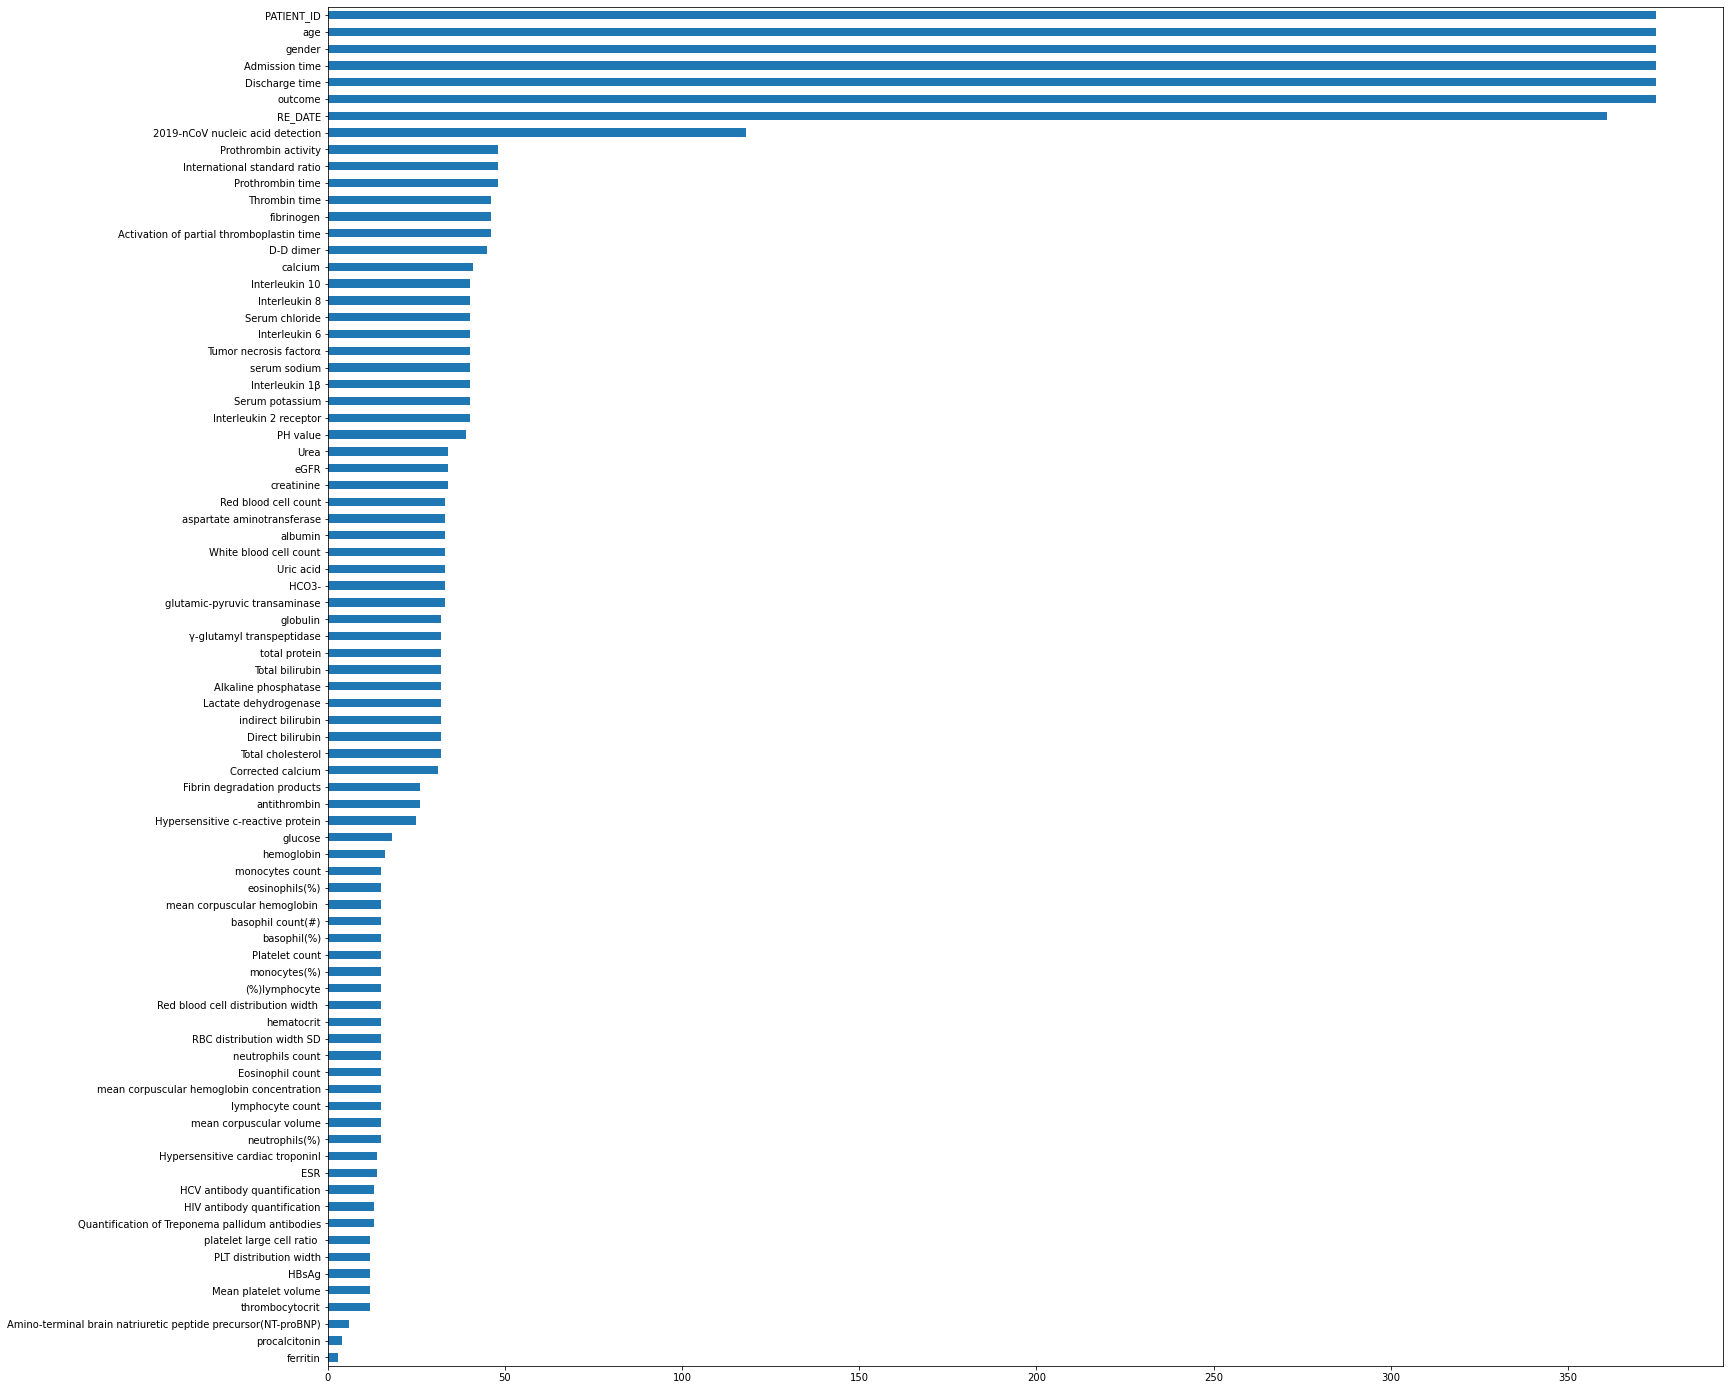

In [32]:
import numpy as np
data3 = data_1.notnull().sum()
data3.sort_values().plot(kind="barh",figsize = (25,25))

outcome
0    201
1    174
dtype: int64


<AxesSubplot:xlabel='outcome', ylabel='count'>

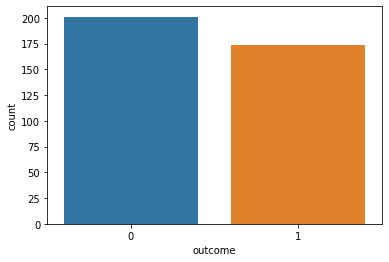

In [33]:
import seaborn as sns
print(data_1.groupby('outcome').size())
sns.countplot(x="outcome", data=data_1)

In [34]:
data_1["time_in_hospital"] = (data_1['Discharge time']- data_1['Admission time']).dt.total_seconds()/(86400.0)

#### Load Test Data

In [37]:
test_data = pd.read_excel("time_series_test_110_preprocess_en.xlsx")  #test data
test_data['PATIENT_ID'] = test_data['PATIENT_ID'].fillna(method = 'ffill')
test_data.head()

,PATIENT_ID,RE_DATE,Lactate dehydrogenase,Hypersensitive c-reactive protein,(%)lymphocyte,Admission time,Discharge time,outcome
0,1.0,2020-02-10 11:15:00.000000,NaN,NaN,28.0,2020-02-09 10:47:24,2020-02-21 14:51:12,0
1,1.0,2020-02-10 12:07:00.000000,183.0,5.1,NaN,2020-02-09 10:47:24,2020-02-21 14:51:12,0
2,1.0,2020-02-13 09:34:59.999999,NaN,NaN,28.6,2020-02-09 10:47:24,2020-02-21 14:51:12,0
3,1.0,2020-02-13 10:06:00.000000,194.0,2.7,NaN,2020-02-09 10:47:24,2020-02-21 14:51:12,0
4,2.0,2020-02-09 06:56:00.000000,NaN,NaN,28.3,2020-02-09 03:39:47,2020-02-21 11:57:40,0


In [38]:
test_data = test_data.sort_values('RE_DATE').groupby('PATIENT_ID').tail(1)
test_data = test_data.sort_values('PATIENT_ID')
test_data.head()
test_data.shape

(110, 8)

<AxesSubplot:>

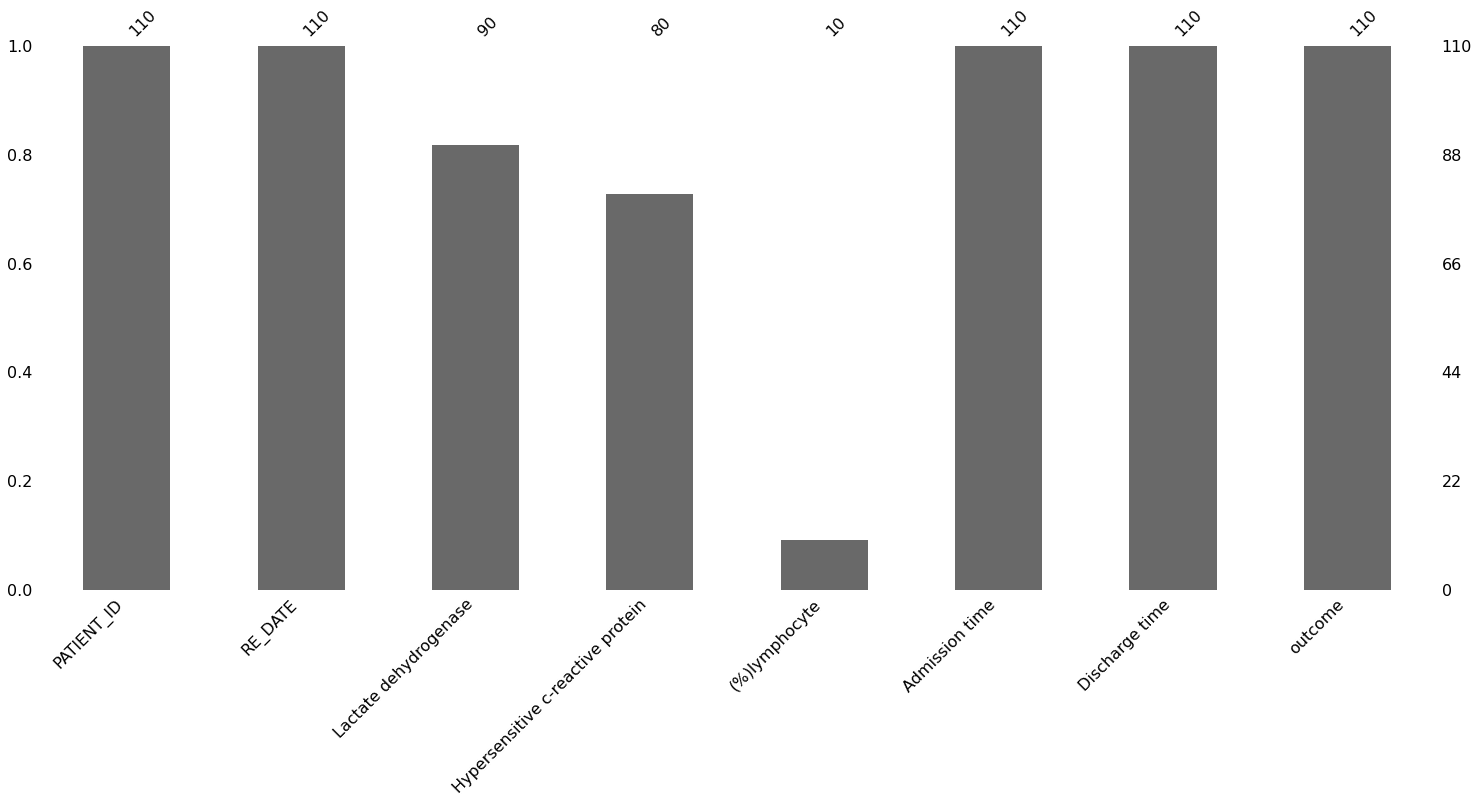

In [39]:
import matplotlib.pyplot as plt
import missingno as msno
msno.bar(test_data)

In [40]:
test_data = test_data.fillna(test_data.median())
test_data

<ipython-input-40-2836df18ae39>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  test_data = test_data.fillna(test_data.median())


,PATIENT_ID,RE_DATE,Lactate dehydrogenase,Hypersensitive c-reactive protein,(%)lymphocyte,Admission time,Discharge time,outcome
3,1.0,2020-02-13 10:06:00,194.0,2.7,29.65,2020-02-09 10:47:24.000000,2020-02-21 14:51:12.000000,0
7,2.0,2020-02-16 11:39:00,172.0,0.7,29.65,2020-02-09 03:39:47.000000,2020-02-21 11:57:40.000000,0
25,3.0,2020-02-13 11:04:00,1131.0,9.1,29.65,2020-01-27 23:06:56.000000,2020-02-14 17:53:08.000000,1
33,4.0,2020-03-04 08:02:36,161.0,2.1,29.65,2020-02-01 19:49:13.000000,2020-02-22 14:22:38.000000,0
39,5.0,2020-02-04 11:04:00,241.0,4.6,29.65,2020-01-22 19:42:32.000000,2020-02-04 15:09:30.000000,0
...,...,...,...,...,...,...,...,...
716,106.0,2020-02-24 10:21:09,740.0,263.6,29.65,2020-02-05 04:30:20.999999,2020-02-24 11:14:40.000000,1
720,107.0,2020-02-14 10:02:00,152.0,0.4,29.65,2020-02-05 01:34:51.000000,2020-02-22 12:34:44.000000,0
728,108.0,2020-02-19 07:16:34,148.0,1.1,29.65,2020-02-05 01:23:47.000000,2020-02-22 12:20:40.000000,0
750,109.0,2020-02-17 07:39:00,430.0,2.0,29.65,2020-02-05 00:29:05.000000,2020-02-18 12:05:02.000000,1


In [41]:
test_data["time_in_hospital"] = (test_data['Discharge time']- test_data['Admission time']).dt.total_seconds()/(86400.0)
test_data.dtypes

PATIENT_ID                                  float64
RE_DATE                              datetime64[ns]
Lactate dehydrogenase                       float64
Hypersensitive c-reactive protein           float64
(%)lymphocyte                               float64
Admission time                       datetime64[ns]
Discharge time                       datetime64[ns]
outcome                                       int64
time_in_hospital                            float64
dtype: object

##  TEST 1: prediction using the same features as test data (Replicating the reference paper)

In [35]:
#taking the same data features as of test dataset
train_data = data_1[['PATIENT_ID','RE_DATE','Admission time','Discharge time','outcome','Hypersensitive c-reactive protein','(%)lymphocyte','Lactate dehydrogenase',"time_in_hospital"]]

In [42]:
print("train_data types:\n",train_data.dtypes)
print("test_data types:\n",test_data.dtypes)
train_data.index = np.arange(1, len(train_data)+1)
train_data['PATIENT_ID']=train_data.index
test_data.index = np.arange(1, len(test_data)+1)
test_data['PATIENT_ID']=test_data.index


train_data types:
 PATIENT_ID                                    int64
RE_DATE                              datetime64[ns]
Admission time                       datetime64[ns]
Discharge time                       datetime64[ns]
outcome                                       int64
Hypersensitive c-reactive protein           float64
(%)lymphocyte                               float64
Lactate dehydrogenase                       float64
time_in_hospital                            float64
dtype: object
test_data types:
 PATIENT_ID                                  float64
RE_DATE                              datetime64[ns]
Lactate dehydrogenase                       float64
Hypersensitive c-reactive protein           float64
(%)lymphocyte                               float64
Admission time                       datetime64[ns]
Discharge time                       datetime64[ns]
outcome                                       int64
time_in_hospital                            float64
dtype: object

<ipython-input-42-e2f2e21802ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['PATIENT_ID']=train_data.index


## Decision Tree

In [56]:
features_column =  ['Lactate dehydrogenase', '(%)lymphocyte','Hypersensitive c-reactive protein',"time_in_hospital"]
target_column = ['outcome']
Xtrain_data = train_data[features_column]
Ytrain_data = train_data[target_column]
Xtest_data = test_data[features_column]
Ytest_data = test_data[target_column]
model_DT = DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=0)
model_DT= model_DT.fit(Xtrain_data,Ytrain_data)
target_pred = model_DT.predict(Xtest_data)

#print(target_pred)
print("accuracy DT",metrics.accuracy_score(Ytest_data, target_pred))

accuracy DT 0.7807133421400264


## Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)
model_RF = model_RF.fit(Xtrain_data,Ytrain_data)
target_pred_RF = model_RF.predict(Xtest_data)
print("accuracy RF",metrics.accuracy_score(Ytest_data, target_pred_RF))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


accuracy RF 0.8441215323645971


## Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB
model_GB = GaussianNB()
model_GB = model_GB.fit(Xtrain_data,Ytrain_data)
target_pred_GB = model_GB.predict(Xtest_data)
print("accuracy SVM",metrics.accuracy_score(Ytest_data, target_pred_GB))

accuracy SVM 0.6301188903566711


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model_LR = LogisticRegression(solver='liblinear', random_state=0)
model_LR = model_LR.fit(Xtrain_data,Ytrain_data)
target_pred_LR = model_LR.predict(Xtest_data)
metrics.accuracy_score(Ytest_data, target_pred_LR)

C:\Users\31644\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6406869220607662

In [41]:
confusion_matrix(Ytest_data,target_pred_LR)

array([[485,   0],
       [272,   0]], dtype=int64)

In [10]:
from sklearn.svm import SVC

model_SVM = SVC()
model_SVM  = model_SVM.fit(Xtrain_data,Ytrain_data)
target_pred_SVM = model_SVM.predict(Xtest_data)
metrics.accuracy_score(Ytest_data, target_pred_SVM)

C:\Users\31644\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.5640686922060766

In [52]:
## for given test and train
acc_results = [(metrics.accuracy_score(Ytest_data, target_pred))*100,(metrics.accuracy_score(Ytest_data, target_pred_RF))*100,(metrics.accuracy_score(Ytest_data, target_pred_SVM))*100]
acc_results

[78.07133421400265, 84.4121532364597, 56.40686922060766]

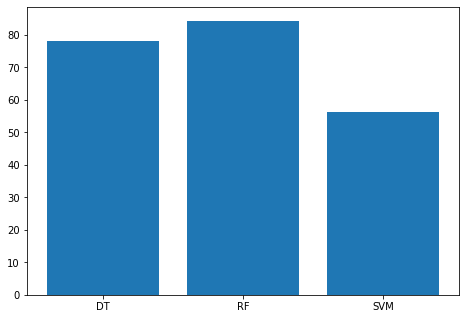

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['DT', 'RF','SVM']

ax.bar(langs,acc_results)
plt.show()

## Test 2: Models for train test split data - Biomarkers selected by research and doctors

In [27]:
# training data for 7 selected biomarkers

train_data_new = data_1[['PATIENT_ID','RE_DATE','Admission time','Discharge time','outcome','2019-nCoV nucleic acid detection','Platelet count','D-D dimer','Hypersensitive cardiac troponinI','lymphocyte count','creatinine','White blood cell count','neutrophils count','Urea',]]

In [28]:
train_data_new.index = np.arange(1, len(train_data_new)+1)
train_data_new['PATIENT_ID']=train_data_new.index
train_data_new.head()

<ipython-input-28-f794b9be25d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_new['PATIENT_ID']=train_data_new.index


,PATIENT_ID,RE_DATE,Admission time,Discharge time,outcome,2019-nCoV nucleic acid detection,Platelet count,D-D dimer,Hypersensitive cardiac troponinI,lymphocyte count,creatinine,White blood cell count,neutrophils count,Urea
1,1,2020-01-31 01:09:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-01-31 01:25:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,105.0,NaN,NaN,0.8,NaN,3.54,2.33,NaN
3,3,2020-01-31 01:44:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,NaN,NaN,130.0,NaN,NaN,8.5
4,4,2020-01-31 01:45:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2020-01-31 01:56:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,19.9,NaN,NaN,NaN,NaN,NaN


In [65]:
features = ['PATIENT_ID','2019-nCoV nucleic acid detection','Platelet count','D-D dimer','Hypersensitive cardiac troponinI','lymphocyte count','creatinine','White blood cell count','neutrophils count','Urea','time_in_hospital']
target = ['outcome']
X = train_data_new[features]
y = train_data_new[target]

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


DT: 0.975327 (0.074020)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

SVM: 0.741013 (0.131917)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d 

RF: 0.976307 (0.071078)


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


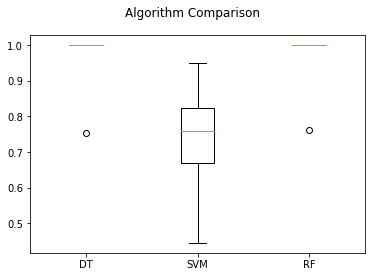

In [66]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X = train_data_new[features]
Y = train_data_new[target]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)
))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
#plt.bar(results,height=100)
plt.subplot()
ax.set_xticklabels(names)
plt.show()

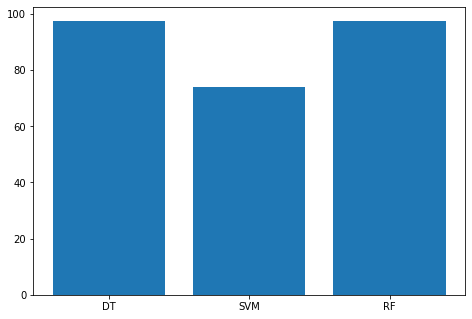

In [44]:
res = [97.5,74.1,97.6]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['DT','SVM','RF']

ax.bar(langs,res,labels)
plt.show()

## Combined set


In [21]:

train_data_combined = data_1[['PATIENT_ID','RE_DATE','Admission time','Discharge time','outcome','2019-nCoV nucleic acid detection','Platelet count','D-D dimer','Hypersensitive cardiac troponinI','lymphocyte count','creatinine','White blood cell count','neutrophils count','Urea','Hypersensitive c-reactive protein','(%)lymphocyte','Lactate dehydrogenase']]
train_data_combined.index = np.arange(1, len(train_data_combined)+1)
train_data_combined['PATIENT_ID']=train_data_combined.index

train_data_combined.head()

<ipython-input-21-5053c8488dc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_combined['PATIENT_ID']=train_data_combined.index


,PATIENT_ID,RE_DATE,Admission time,Discharge time,outcome,2019-nCoV nucleic acid detection,Platelet count,D-D dimer,Hypersensitive cardiac troponinI,lymphocyte count,creatinine,White blood cell count,neutrophils count,Urea,Hypersensitive c-reactive protein,(%)lymphocyte,Lactate dehydrogenase
1,1,2020-01-31 01:09:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-01-31 01:25:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,105.0,NaN,NaN,0.8,NaN,3.54,2.33,NaN,NaN,22.6,NaN
3,3,2020-01-31 01:44:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,NaN,NaN,130.0,NaN,NaN,8.5,43.1,NaN,306.0
4,4,2020-01-31 01:45:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2020-01-31 01:56:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
train_data_combined["time_in_hospital"] = pd.to_numeric(train_data_combined['Discharge time']- train_data_combined['Admission time'])
#train_data_new.dtypes
values4 = {'2019-nCoV nucleic acid detection':train_data_combined['2019-nCoV nucleic acid detection'].median(),'Platelet count':train_data_combined['Platelet count'].median(),'D-D dimer':train_data_combined['D-D dimer'].median(),'Hypersensitive cardiac troponinI':train_data_combined['Hypersensitive cardiac troponinI'].median(),'lymphocyte count':train_data_combined['lymphocyte count'].median(),'creatinine':train_data_combined['creatinine'].median(),'White blood cell count':train_data_combined['White blood cell count'].median(),'neutrophils count':train_data_combined['neutrophils count'].median(),'Urea':train_data_combined['Urea'].median(),'Hypersensitive c-reactive protein':train_data_combined['Hypersensitive c-reactive protein'].median(),'(%)lymphocyte':train_data_combined['(%)lymphocyte'].median(),'Lactate dehydrogenase':train_data_combined['Lactate dehydrogenase'].median()}
train_data_combined = train_data_combined.fillna(value = values4)
train_data_combined.head()

<ipython-input-22-3353c5778231>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_combined["time_in_hospital"] = pd.to_numeric(train_data_combined['Discharge time']- train_data_combined['Admission time'])


,PATIENT_ID,RE_DATE,Admission time,Discharge time,outcome,2019-nCoV nucleic acid detection,Platelet count,D-D dimer,Hypersensitive cardiac troponinI,lymphocyte count,creatinine,White blood cell count,neutrophils count,Urea,Hypersensitive c-reactive protein,(%)lymphocyte,Lactate dehydrogenase,time_in_hospital
1,1,2020-01-31 01:09:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,-1.0,178.0,2.155,20.6,0.8,76.0,7.72,5.85,5.985,51.5,11.45,340.0,1520842000000000
2,2,2020-01-31 01:25:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,-1.0,105.0,2.155,20.6,0.8,76.0,3.54,2.33,5.985,51.5,22.60,340.0,1520842000000000
3,3,2020-01-31 01:44:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,-1.0,178.0,2.155,20.6,0.8,130.0,7.72,5.85,8.500,43.1,11.45,306.0,1520842000000000
4,4,2020-01-31 01:45:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,-1.0,178.0,2.200,20.6,0.8,76.0,7.72,5.85,5.985,51.5,11.45,340.0,1520842000000000
5,5,2020-01-31 01:56:00,2020-01-30 22:12:47,2020-02-17 12:40:09,0,-1.0,178.0,2.155,19.9,0.8,76.0,7.72,5.85,5.985,51.5,11.45,340.0,1520842000000000


In [67]:
features2 = ['PATIENT_ID','2019-nCoV nucleic acid detection','Platelet count','D-D dimer','Hypersensitive cardiac troponinI','lymphocyte count','creatinine','White blood cell count','neutrophils count','Urea','time_in_hospital','Lactate dehydrogenase', '(%)lymphocyte','Hypersensitive c-reactive protein']
target2 = ['outcome']
X2 = train_data_combined[features2]
y2 = train_data_combined[target2]

In [68]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


DT: 0.975327 (0.074020)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

SVM: 0.741013 (0.131917)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d 

RF: 0.976797 (0.069608)


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


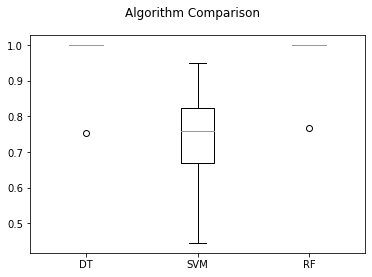

In [69]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
X = train_data_combined[features2]
Y = train_data_combined[target2]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)
))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
#plt.bar(results,height=100)
plt.subplot()
ax.set_xticklabels(names)
plt.show()

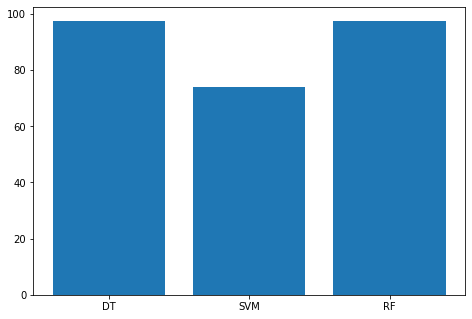

In [59]:
qw = [97.5,74.1,97.6]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['DT','SVM','RF']

ax.bar(langs,qw)
plt.show()

### RQ 2

### Feature Selection using XGBoost

In [48]:
# feature selection from all the biomarkers
feature = ['Hypersensitive cardiac troponinI',
       'hemoglobin', 'Serum chloride', 'Prothrombin time', 'procalcitonin',
       'eosinophils(%)', 'Interleukin 2 receptor', 'Alkaline phosphatase',
       'albumin', 'basophil(%)', 'Interleukin 10', 'Total bilirubin',
       'Platelet count', 'monocytes(%)', 'antithrombin', 'Interleukin 8',
       'indirect bilirubin', 'Red blood cell distribution width ',
       'neutrophils(%)', 'total protein',
       'Quantification of Treponema pallidum antibodies',
       'Prothrombin activity', 'HBsAg', 'mean corpuscular volume',
       'hematocrit', 'White blood cell count', 'Tumor necrosis factorα',
       'mean corpuscular hemoglobin concentration', 'fibrinogen',
       'Interleukin 1β', 'Urea', 'lymphocyte count', 'PH value',
       'Red blood cell count', 'Eosinophil count', 'Corrected calcium',
       'Serum potassium', 'glucose', 'neutrophils count', 'Direct bilirubin',
       'Mean platelet volume', 'ferritin', 'RBC distribution width SD',
       'Thrombin time', '(%)lymphocyte', 'HCV antibody quantification',
       'D-D dimer', 'Total cholesterol', 'aspartate aminotransferase',
       'Uric acid', 'HCO3-', 'calcium',
       'Amino-terminal brain natriuretic peptide precursor(NT-proBNP)',
       'Lactate dehydrogenase', 'platelet large cell ratio ', 'Interleukin 6',
       'Fibrin degradation products', 'monocytes count',
       'PLT distribution width', 'globulin', 'γ-glutamyl transpeptidase',
       'International standard ratio', 'basophil count(#)',
       '2019-nCoV nucleic acid detection', 'mean corpuscular hemoglobin ',
       'Activation of partial thromboplastin time',
       'Hypersensitive c-reactive protein', 'HIV antibody quantification',
       'serum sodium', 'thrombocytocrit', 'ESR',
       'glutamic-pyruvic transaminase', 'eGFR', 'creatinine']
outcome = ['outcome']
Xdata = data_1[feature]
Ydata = data_1[outcome]
Xdata = Xdata.fillna(Xdata.median())
Xdata.head()

,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,Alkaline phosphatase,albumin,basophil(%),...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,20.6,125.0,102.1,14.8,0.10,0.1,676.5,69.5,32.2,0.2,...,30.9,39.2,51.5,0.09,140.4,0.21,28.0,24.0,87.9,76.0
1,20.6,136.0,102.1,14.8,0.10,0.6,676.5,69.5,32.2,0.3,...,31.9,39.2,51.5,0.09,140.4,0.12,28.0,24.0,87.9,76.0
2,20.6,125.0,103.1,14.8,0.10,0.1,676.5,46.0,33.3,0.2,...,30.9,39.2,43.1,0.09,137.7,0.21,28.0,16.0,46.6,130.0
3,20.6,125.0,102.1,13.9,0.10,0.1,676.5,69.5,32.2,0.2,...,30.9,39.2,51.5,0.09,140.4,0.21,28.0,24.0,87.9,76.0
4,19.9,125.0,102.1,14.8,0.09,0.1,676.5,69.5,32.2,0.2,...,30.9,39.2,51.5,0.09,140.4,0.21,28.0,24.0,87.9,76.0


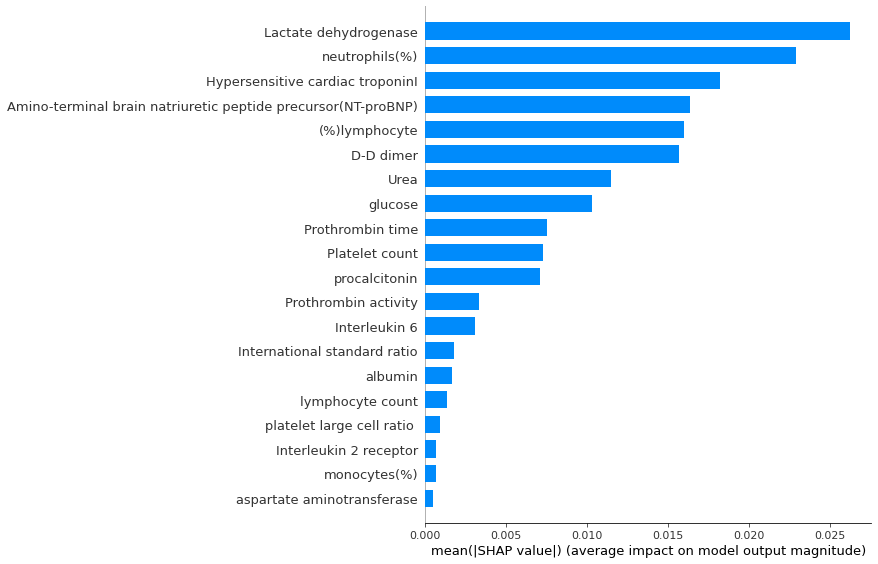

In [49]:
!pip install xgboost
!pip install shap
import xgboost
import shap
# load JS visualization code to notebook
shap.initjs()
# train XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(Xdata, label=Ydata), 100)
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xdata)
shap.summary_plot(shap_values, Xdata, plot_type="bar")

### Prediction using top 10 features from XGBoost feature selection model

In [50]:
fs = ['Lactate dehydrogenase','neutrophils(%)','Hypersensitive c-reactive protein','Amino-terminal brain natriuretic peptide precursor(NT-proBNP)','(%)lymphocyte','D-D dimer','Urea','glucose','Prothrombin time','Platelet count','procalcitonin']
ts = ['outcome']
Xs = Xdata[fs]
Ys = Ydata[ts]
Xs.head()

,Lactate dehydrogenase,neutrophils(%),Hypersensitive c-reactive protein,Amino-terminal brain natriuretic peptide precursor(NT-proBNP),(%)lymphocyte,D-D dimer,Urea,glucose,Prothrombin time,Platelet count,procalcitonin
0,340.0,82.4,51.5,585.0,11.45,2.155,5.985,6.99,14.8,178.0,0.10
1,340.0,65.8,51.5,585.0,22.60,2.155,5.985,6.99,14.8,105.0,0.10
2,306.0,82.4,43.1,585.0,11.45,2.155,8.500,6.99,14.8,178.0,0.10
3,340.0,82.4,51.5,585.0,11.45,2.200,5.985,6.99,13.9,178.0,0.10
4,340.0,82.4,51.5,60.0,11.45,2.155,5.985,7.35,14.8,178.0,0.09


#### Decision Tree, Random Forest and SVM model validation using Cross Validation

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


DT: 0.726144 (0.180310)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when

SVM: 0.574346 (0.379206)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d 

RF: 0.742484 (0.178298)


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


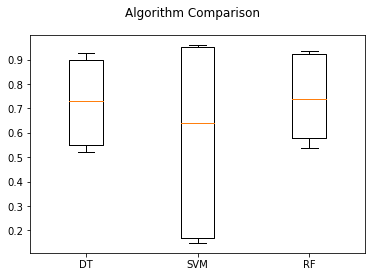

In [51]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Data
Xs = Xdata[fs]
Ys = Ydata[ts]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []

models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xs, Ys, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
#plt.bar(results,height=100)
plt.subplot()
ax.set_xticklabels(names)
plt.show()

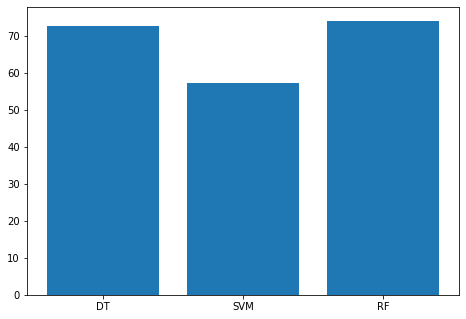

In [70]:
r = [72.6,57.4,74.2]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['DT','SVM', 'RF']

ax.bar(langs,r)
plt.show()